In [4]:
import pandas as pd

In [5]:
# Importing data
data = pd.read_csv('credit_default.csv')

In [6]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# checking if data has any missing values
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
data.SEX.replace([1,2], [1, 0], inplace= True)

In [9]:
data.SEX.unique()

array([0, 1], dtype=int64)

In [10]:
data.MARRIAGE.replace([1,2], [1, 0], inplace= True)

In [11]:
data.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

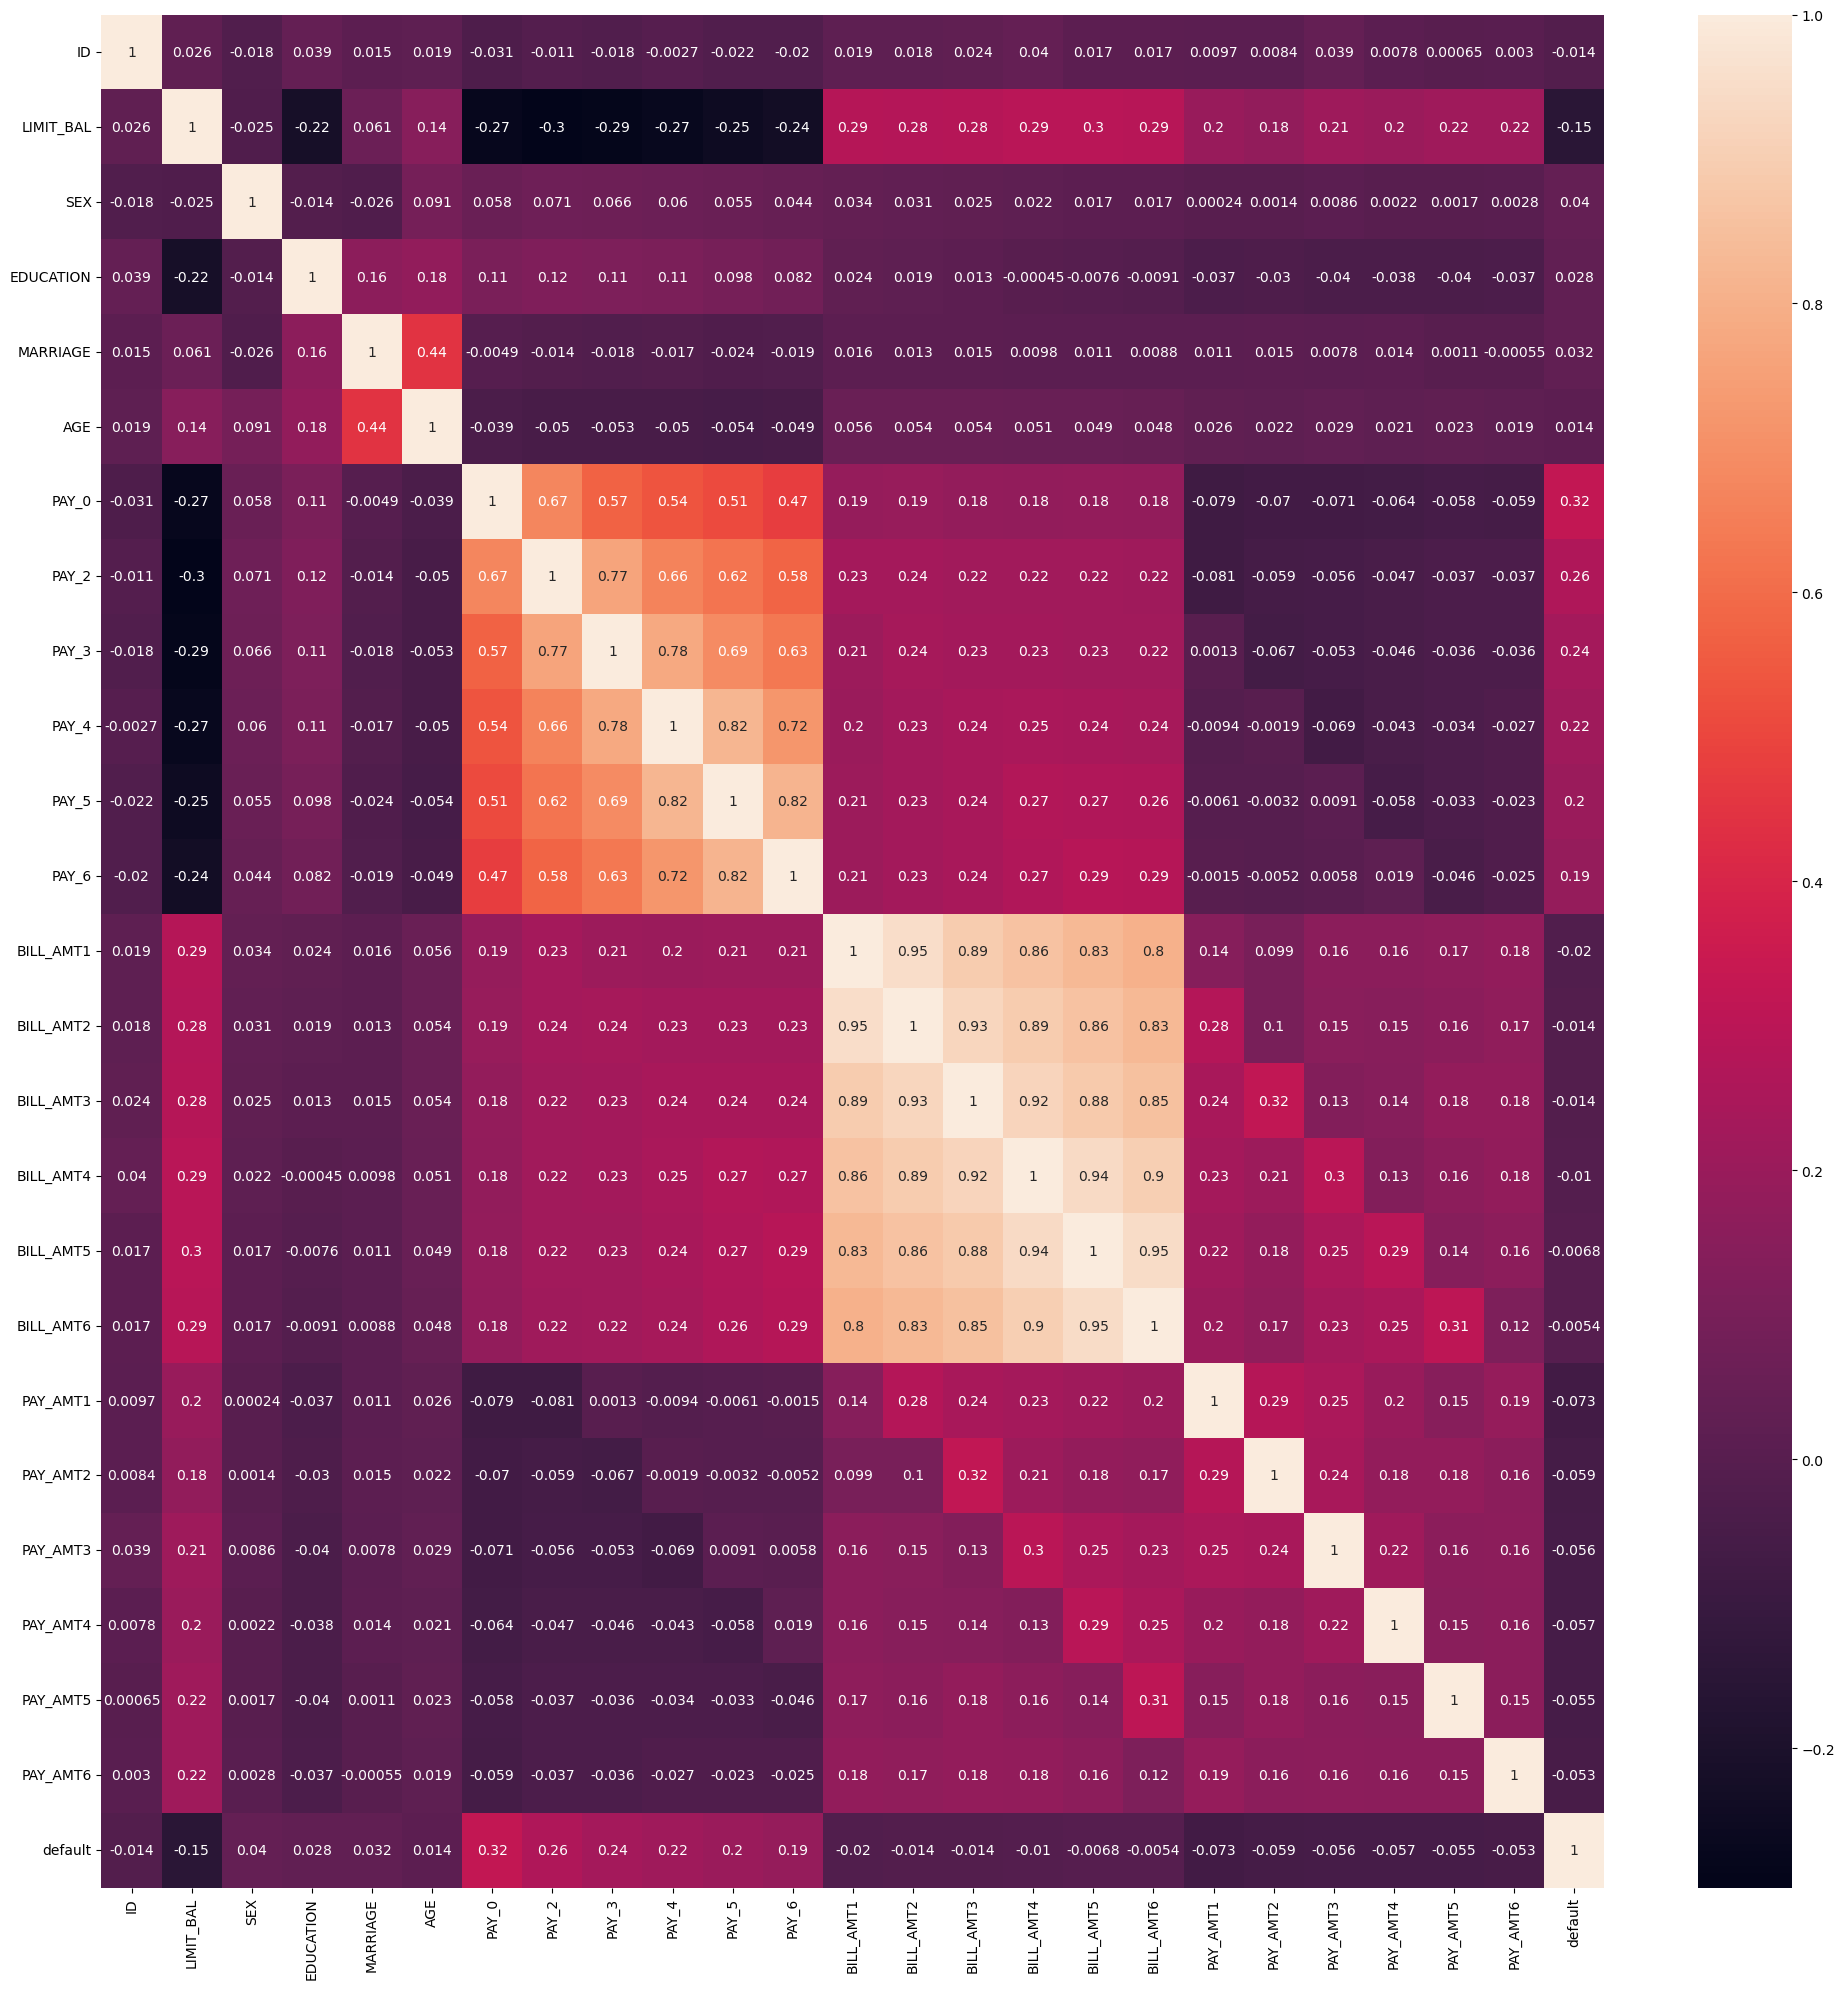

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#splitting data
x = data.drop(['ID','default'],axis = 1)
y = data.default

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [34]:
model = RandomForestClassifier(n_estimators= 1000)
model.fit(x_train,y_train)
print(f"Baseline RandomForest Classifier Model Score: {model.score(x_test,y_test) * 100:.2f} %")

Baseline RandomForest Classifier Model Score: 81.56 %
